<img src="https://conted.ox.ac.uk/www/static/images/oudce_logo.svg" width=500> 


<span style="color:navy"><b>Artificial Intelligence: Generative AI, Cloud and MLOps (online)</b></span>
---
# <span style="color:#ff8000">Introduction to Retrieval Augmented Generation (RAG)</span>
01 March 2025

Abhinav Kimothi


Retrieval Augmented Generation, or RAG, has emerged to be one of the most popular techniques in the applied generative AI world. Large Language Models, or LLMs, is a generative AI technology that has recently gained tremendous popularity. However, despite their unprecedented ability to generate text, their responses are __not always correct__. Upon more careful observation, you may notice that LLM responses are plagued with __sub-optimal information__ and __inherent memory limitations__.  RAG addresses these limitations of LLMs by providing them with information __external__ to these models. Thereby, resulting in LLM responses that are more reliable and trustworthy. 

<img src="./Assets/Images/RAG.png" width=500>

> The technique of __enhancing the parametric memory__ of an LLM by creating access to an __explicit non-parametric memory__, from which a __retriever__ can fetch relevant information, augment that information to the prompt, pass the prompt to an LLM to enable the LLM to generate a response that is __contextual, reliable, and factually accurate__ is called __Retrieval Augmented Generation__

For an in-depth understanding of RAG, read [A Simple Guide to Retrieval Augemnted Generation](https://mng.bz/6ePo)

<a href="https://mng.bz/6ePo" target="_blank">
    <img src="./Assets/Images/NewMEAP.png" width=350> <img src="./Assets/Images/Oxford University - kimothi.png">
</a>

---

## <span style="color:#ff8000">About this notebook</span>

This is a supplementary notebook for the session __Introduction to Retrieval Augmented Generation__ by _Abhinav Kimothi_ in week 7 of the __Artificial Intelligence: Generative AI, Cloud and MLOps (online)__ course by _Department for Continuing Education at the University of Oxford_. 

### <span style="color:#47c7fc">Contents</span>

This notebook contains code in python and leverages the LangChain framework to build and evaluate the different components of a RAG pipeline. 

- Indexing Pipeline
    -  Data Loading
    - Chunking (or Data Splitting)
    - Embeddings (or Data Transformation)
    - Storage (Vector Databases)

- Generation Pipeline
    - Search & Retrieval
    - Prompt Augmentation
    - LLM Generation

- RAG Evaluation using RAGAs Framework
    - Synthetic Dataset Generation
    - Calculation of Evaluation Metrics

### <span style="color:#47c7fc">Structure</span>

Each section of this notebook first __demonstrates__ the components using an example and is followed by an __exercise for you to solve__.

#### __Demonstration__

This notebook demonstrates __RAG using a webpage on the internet__. We know that LLMs inherently __do not have access to the internet__ and have a __knowledge cut-off date__ that prevents them from having access to latest information. RAG with websearch overcomes this limitation.

In this notebook, we take the example of the __Wikipedia Article on 2023 Men's ODI Cricket World Cup__

#### __Exercise__

LLMs also do not have access to any data that is not in their training set. Therefore, __proprietary data is not available__ to LLMs. This where RAG helps in searching through proprietary data files. 

In this notebook, you'll be asked to build a RAG system on a PDF file which is neither available on the internet, nor is a part of any LLMs training dataset.


I hope you have as much fun going through this notebook, as I had while creating it. Let's get started!!

> Important Note: This notebook requires OpenAI credits. The notebook uses __Text-embedding-3-small__ embeddings model and __GPT-4o-mini__ LLM. 

> __Running the entire notebook once including the exercises will cost about USD $0.11 (11 cents)__

---

## <span style="color:#ff8000">Installing Dependencies</span>

All the necessary libraries for running this notebook along with their versions can be found in __requirements.txt__ file in the root directory of this repository

You should go to the root directory and run the following command to install the libraries

```
pip install -r requirements.txt
```

This is the recommended method of installing the dependencies


_Alternatively, you can run the command from this notebook too. The relative path may vary so ensure that you are in the root directory of this repository_

In [131]:
%pip install -r ./requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


---

## <span style="color:#ff8000">Indexing Pipeline</span>

A core RAG system contains two pipelines - 
 - Indexing Pipeline that creates the external knowledge base 
 - Generation Pipeline that facilitates real-time interaction with the knowledge base

The indexing pipeline can be understood in five steps

<img src="./Assets/Images/Indexing Pipeline.png" width=500>

There are consequently __four components__ that facilitate these five steps - 

<img src="./Assets/Images/Index Comp.png" width = 500>

Let's take a look at these four components




### <span style="color:#47c7fc">Data Loading</span>

#### __What is Data Loading?__

The first step towards building a knowledge base (or non-parametric memory) of a RAG-enabled system is to source data from its original location. This data may be in the form of word documents, pdf files, csv, HTML etc. Further, the data may be stored in file, block or object stores, in data lakes, data warehouses or even in third party sources that can be accessed via the open internet. This process of sourcing data from its original location is called __Data Loading__. 

Data Loading includes the following four steps:
- __Connection__ to the source of the data
- __Extraction and Parsing of text__ from the source format
- Reviewing and updating __metadata__ information
- Cleaning or __transforming__ the data

<img src="./Assets/Images/DataLoading.png" width=500>

#### __Connecting & Parsing an external URL__

Let us load the url of our example i.e. the Wikipedia Page of the 2023 Cricket World Cup

In [132]:
#This is the url of the wikipedia page on the 2023 Cricket World Cup
url="https://en.wikipedia.org/wiki/2023_Cricket_World_Cup"

__LangChain__ provides a wide array of __document loaders__ (over 100) that help in loading data from a large number of data sources like _Webpages, PDF files, Cloud Storage Systems, Social Platforms, Messaging Services, Tools and more_. 

Here we use one of them, __AsyncHtmlLoader__ that loads the HTML data from web URLs. 

In [133]:
#Import library
from langchain_community.document_loaders import AsyncHtmlLoader

#Instantiate the AsyncHtmlLoader object
loader = AsyncHtmlLoader (url)

#Loading the extracted information
html_data = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.03it/s]


To verify the extracted text and the metadata, let us print a few tokens

In [134]:
import textwrap

print(textwrap.fill(f"First 1000 characters of extracted content -\n\n{html_data[0].page_content[:1000]}", width=150))

First 1000 characters of extracted content -  <!DOCTYPE html> <html class="client-nojs vector-feature-language-in-header-enabled vector-feature-
language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-
pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1
vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-
available" lang="en" dir="ltr"> <head> <meta charset="UTF-8"> <title>2023 Cricket World Cup - Wikipedia</title> <script>(function(){var
className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-
disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-

#### __Metadata Review__

In [135]:
print(f"Metadata information - \n\n{html_data[0].metadata}")

Metadata information - 

{'source': 'https://en.wikipedia.org/wiki/2023_Cricket_World_Cup', 'title': '2023 Cricket World Cup - Wikipedia', 'language': 'en'}


We can see that some __content has been extracted__. Also, some __metadata__ information is present.

#### __Document Transformation__

The content is in __HTML format__ which does not convey a lot of factual information. 

LangChain also provides a bunch of document transformers for converting formats.


We will now transform this data into a readable format using __Html2TextTransformer__ class.

In [136]:
from langchain_community.document_transformers import Html2TextTransformer

#Instantiate the Html2TextTransformer function
html2text = Html2TextTransformer()


#Call transform_documents
html_data_transformed = html2text.transform_documents(html_data)

Let us review the extracted content, now transformed by the Html2TextTransformer

In [137]:
print(f"First 100 characters of extracted content -\n\n{html_data_transformed[0].page_content[:1000]}")

First 100 characters of extracted content -

Jump to content

Main menu

Main menu

move to sidebar hide

Navigation

  * Main page
  * Contents
  * Current events
  * Random article
  * About Wikipedia
  * Contact us

Contribute

  * Help
  * Learn to edit
  * Community portal
  * Recent changes
  * Upload file
  * Special pages

Search

Search

Appearance

  * Donate
  * Create account
  * Log in

Personal tools

  * Donate
  * Create account
  * Log in

Pages for logged out editors learn more

  * Contributions
  * Talk

## Contents

move to sidebar hide

  * (Top)

  * 1 Background

Toggle Background subsection

    * 1.1 Host selection

    * 1.2 COVID-19 pandemic

    * 1.3 Format

    * 1.4 Pakistan's participation

    * 1.5 Prize money

    * 1.6 Marketing

  * 2 Qualification

  * 3 Venues

  * 4 Squads

  * 5 Match officials

  * 6 Warm-up matches

  * 7 Group stage

Toggle Group stage subsection

    * 7.1 Points table

    * 7.2 Results

  * 8 Knockout stage

Toggle Knocko

Now, we see that we have text in a __readable english__ language! 

#### __Optional: BeautifulSoupTransformer__


But you may notics that there's a lot of information like Menu Options, Header and footer information that may not be very useful.

Another options is the __BeautifulSoupTransformer__ in LangChain that allows you to extract specific tags from HTML pages. Let us extract information contained in 'p' tags.

In [138]:
from langchain_community.document_transformers import BeautifulSoupTransformer

soup_transformer = BeautifulSoupTransformer()

html_data_p_tags = soup_transformer.transform_documents(html_data, tags_to_extract=["p"])

In [139]:
print(textwrap.fill(
f"First 100 characters of extracted content -\n\n{html_data_p_tags[0].page_content[:1000]}", width=100))

First 100 characters of extracted content -  The 2023 ICC Men's Cricket World Cup was the 13th
edition of the ICC Men's Cricket World Cup (/wiki/ICC_Men%27s_Cricket_World_Cup) , a quadrennial One
Day International (/wiki/One_Day_International) (ODI) cricket (/wiki/Cricket) tournament organized
by the International Cricket Council (/wiki/International_Cricket_Council) (ICC). It was hosted from
5 October to 19 November 2023 across ten venues in India (/wiki/India) . This was the fourth World
Cup held in India, but the first where India was the sole host. The tournament was contested by ten
national teams, maintaining the same format used in 2019 (/wiki/2019_Cricket_World_Cup) . After six
weeks of round-robin matches, India (/wiki/India_national_cricket_team) , South Africa
(/wiki/South_Africa_national_cricket_team) , Australia (/wiki/Australia_national_cricket_team) , and
New Zealand (/wiki/New_Zealand_national_cricket_team) finished as the top four and qualified for the
knockout stage. 

We have seen how to load text from an external source. 

Now it's time for you to try data loading!

### <span style="color:#47c7fc">Exercise: PDF Document (Employee Leave Policy)</span>

The file that you're going to read is the __Employee Leave Policy__ of a fictitious organisation named AKAIWorks LLP. The file is present in a __PDF format__ and the folder location is __'./Assets/Data/'__


In [140]:
filepath='./Assets/Data/EmployeeLeavePolicy.pdf'

#### __Exercise:__

Your task is to load the pdf file using the PyPDFLoader and print the first 1000 characters of the text that has been read

In [141]:
from langchain_community.document_loaders import PyPDFLoader

#START YOUR CODE HERE
pdf_loader = PyPDFLoader(file_path=filepath, mode='single')
pdf_data = pdf_loader.load()
#END YOUR CODE HERE
print(textwrap.fill(f"{pdf_data[0].page_content[:1000]}", width=150))

1.  Title  and  Introduction   Title:  Employee  Leave  Policy    Introduction:   The  Employee  Leave  Policy  of  AKAIWorks  LLP  is  designed  to
outline  the  procedures,   expectations,   and   entitlements   regarding   time   off   from   work   for   all   employees.   This   policy
ensures   that   employees   have   the   opportunity   to   take   necessary   leave   for   personal,   medical,   or   family   reasons   while
maintaining   the   smooth   operation   of   the   organization.   It   is   important   that   all   employees   understand   and   adhere   to
the   guidelines   within   this   document   to   foster   a   fair   and   transparent   process   for   all   parties   involved.   At  AKAIWorks
LLP ,  we  recognize  the  importance  of  balancing  work  and  personal  life  and  strive   to   provide   a   comprehensive   leave   program
that   meets   the   needs   of   our   workforce.   Whether   an   employee   is   taking   time   off   for


<details>
<summary>Click for Hint</summary>

Checkout the [PyPDFLoader documentation](https://python.langchain.com/docs/integrations/document_loaders/pypdfloader/#extract-the-whole-pdf-as-a-single-langchain-document-object)

</details>

<details>
<summary>Click for solution</summary>

```
pdfloader=PyPDFLoader(file_path=filepath, mode='single') #instantiate the PyPDFLoader

pdf_data=pdfloader.load() #load the data

print(textwrap.fill(f"{pdf_data[0].page_content[:1000]}", width=150)) #print the first 1000 characters
```

</details>


#### __Congratulations__

With this, you have successfully completed the data loading step of the indexing pipeline. We move now to the next step of __Chunking__

But before that, check out the document loaders and transformers available in LangChain

__Document Loaders__  - [https://python.langchain.com/docs/integrations/document_loaders/]

__Document Transformers__ - [https://python.langchain.com/docs/integrations/document_transformers/]

---

## <span style="color:#ff8000">2. Data Splitting or Chunking</span>


Breaking down long pieces of text into manageable sizes is called __Data Splitting__ or __Chunking__. This is done for various reasons like Context Window Limitations, Search Complexity, Lost in the middle kind of issues.

### <span style="color:#47c7fc">Understanding Chunking: What is it ?</span>

In cognitive psychology, chunking is defined as process by which individual pieces of information are bound together into a meaningful whole. (https://psycnet.apa.org/record/2003-09163-002) and a chunk is a familiar collection of elementary units. The idea is that chunking is an essential technique through which human beings perceive the world and commit to memory. The simplest example is how we remember long sequences of digits like phone numbers, credit card numbers, dates or even OTPs. We don’t remember the entire sequences but in our minds, we break them down into chunks.

The role of chunking in RAG and the underlying idea is somewhat similar to what it is in real life. Once you’ve extracted and parsed text from the source, instead of committing it all to memory as a single element, you break it down into smaller chunks.

> Breaking down long pieces of text into manageable sizes is called Chunking

### <span style="color:#47c7fc">Understanding Chunking: Why is it necessary ?</span>
There are two main benefits of chunking —

- It leads to better retrieval of information. If a chunk represents a single idea (or fact) it can be retrieved with more confidence that if there are multiple ideas (or facts) within the same chunk.
- It leads to better generation. The retrieved chunk has information that is focussed on the user query and does not have any other text that may confuse the LLM. Therefore, the generation is more accurate and coherent.

Apart from these two benefits there are two limitations of LLMs that chunking addresses.

- __Context Window of LLMs__: LLMs, due to the inherent nature of the technology, have a limit on the number of tokens (loosely, words) they can work with at a time. This includes both the number of tokens in the prompt (or the input) and the number of tokens in the completion (or the output). The limit on the total number of tokens that an LLM can process in one go is called the context window size. If we pass an input that is longer than the context window size, the LLM chooses to ignore all text beyond the size. It becomes very important to be careful with the amount to text that is being passed to the LLM.

- __Lost in the middle problem__: Even in those LLMs which have a long context window (Claude 3 by Anthropic has a context window of up to 200,00 tokens), an issue with accurately reading the information has been observed. It has been noticed that accuracy declines dramatically if the relevant information is somewhere in the middle of the prompt. This problem can be addressed by passing only the relevant information to the LLM instead of the entire document.

### <span style="color:#47c7fc">Fixed Size Chunking</span>

A very common approach is to pre-determine the size of the chunk and the amount of overlap between the chunks. There are several chunking methods that follow a fixed size chunking approach.

- Character-Based Chunking: Chunks are created based on a fixed number of characters

- Token-Based Chunking: Chunks are created based on a fixed number of tokens.

- Sentence-Based Chunking: Chunks are defined by a fixed number of sentences

- Paragraph-Based Chunking: Chunks are created by dividing the text into a fixed number of paragraphs.

Let's try Character-Based Chunking. 

In [142]:
from langchain.text_splitter import RecursiveCharacterTextSplitter #Character Based Text Splitter from LangChain

text_splitter = RecursiveCharacterTextSplitter(
separators=["\n","."], #The character that should be used to split. More than one can be given to try recursively.
chunk_size=1000, #Number of characters in each chunk 
chunk_overlap=100, #Number of overlapping characters between chunks
)

text_chunks=text_splitter.create_documents([html_data_transformed[0].page_content])

#Show the number of chunks created
print(f"The number of chunks created : {len(text_chunks)}")

The number of chunks created : 61


Now, let's see the size distribution of the chunks that have been created

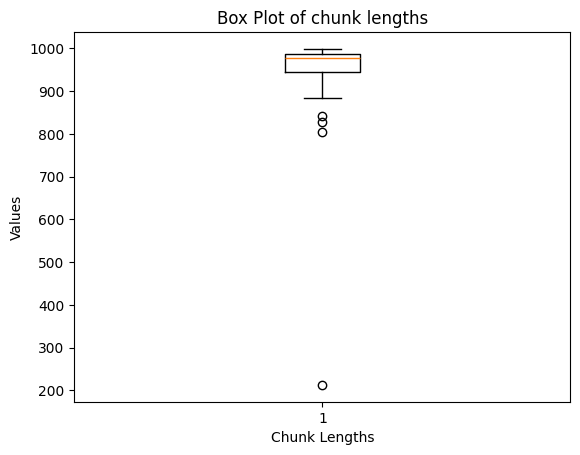

The median chunk length is : 978.0
The average chunk length is : 948.23
The minimum chunk length is : 213
The max chunk length is : 999
The 75th percentile chunk length is : 987.0
The 25th percentile chunk length is : 944.0


In [143]:
import matplotlib.pyplot as plt
import numpy as np


data = [len(doc.page_content) for doc in text_chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths') 
plt.xlabel('Chunk Lengths')  
plt.ylabel('Values') 

plt.show()

print(f"The median chunk length is : {round(np.median(data),2)}")
print(f"The average chunk length is : {round(np.mean(data),2)}")
print(f"The minimum chunk length is : {round(np.min(data),2)}")
print(f"The max chunk length is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

### <span style="color:#47c7fc">Document-structured based Chunking</span>

The aim of chunking is to keep meaningful data together. If we are dealing with data in form of HTML, Markdown, JSON or even computer code, it makes more sense to split the data based on the structure rather than a fixed size. Another approach for chunking is to take into consideration the format of the extracted and loaded data. A markdown file, for example is organised by headers, a code written in a programming language like python or java is organized by classes and functions and HTML, likewise, is organised in headers and sections. For such formats a specialised chunking approach can be employed.

Examples of structure-based splitting:

- Markdown: Split based on headers (e.g., #, ##, ###)
- HTML: Split using tags
- JSON: Split by object or array elements
- Code: Split by functions, classes, or logical blocks


Let's recollect out HTML document from the url.

In [144]:
loader = AsyncHtmlLoader (url)

html_data = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.77it/s]


To split the HTML text based on tags (e.g., h1, section, table, etc.), LangChain provides __HTMLSectionSplitter__. It splits the text and adds metadata for each section. Let's take a look.



In [145]:
from langchain_text_splitters import HTMLSectionSplitter

sections_to_split_on = [
    ("h1", "Header 1"),
     ("h2", "Header 2"),
     ("table","Table"),
     #("div", "Div"),
     #("img","Image"),
     ("p","P"),


]

splitter = HTMLSectionSplitter(sections_to_split_on)

split_content = splitter.split_text(html_data[0].page_content)

The above document object '__split_content__' will have chunks divided based on the provided HTML tags. Let's look at the top 10 documents.

In [146]:
split_content[:10]

[Document(metadata={'Header 1': '#TITLE#'}, page_content='Jump to content \n \n \n \n \n \n \n \n Main menu \n \n \n \n \n \n Main menu \n move to sidebar \n hide \n \n \n \n\t\tNavigation\n\t \n \n \n Main page \n Contents \n Current events \n Random article \n About Wikipedia \n Contact us \n \n \n \n \n \n\t\tContribute\n\t \n \n \n Help \n Learn to edit \n Community portal \n Recent changes \n Upload file \n Special pages \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Search \n \n \n \n \n \n \n \n \n \n \n \n Search \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Appearance \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Donate \n \n \n Create account \n \n \n Log in \n \n \n \n \n \n \n \n \n Personal tools \n \n \n \n \n \n Donate \n   Create account \n   Log in \n \n \n \n \n \n\t\tPages for logged out editors  learn more \n \n \n \n Contributions \n Talk \n \n \n \n \n \n \n \n \n \n \n \n \n  CentralNotice'),
 Document(metadata={'Header

We can see the metatadata indicating the section tag of the chunk.
So how many chunks were created?

In [147]:
len(split_content)

231

Let's see how many chunks for each of the sections

In [148]:
from collections import Counter

class_counter = Counter()

for doc in split_content:
    document_class = next(iter(doc.metadata.keys()))
    class_counter[document_class] += 1

print(class_counter)

Counter({'Table': 189, 'P': 26, 'Header 2': 14, 'Header 1': 2})


Now, let us look at the lengths of these chunks

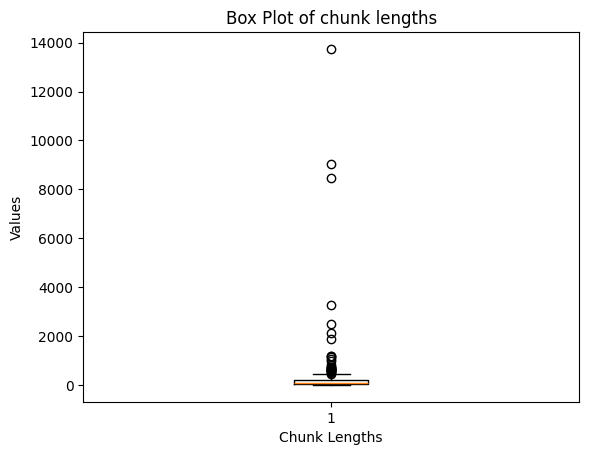

The median chunk lenght is : 71.0
The average chunk lenght is : 329.96
The minimum chunk lenght is : 12
The max chunk lenght is : 13740
The 75th percentile chunk length is : 200.0
The 25th percentile chunk length is : 37.0


In [149]:
data = [len(doc.page_content) for doc in split_content]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')
plt.xlabel('Chunk Lengths')  
plt.ylabel('Values')  

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

Some of the chunk lengths are longer than 1000. Let's try to control that.

In [150]:
text_splitter = RecursiveCharacterTextSplitter(
separators=["\n\n","\n","."], #The character that should be used to split. More than one can be given to try recursively.
chunk_size=1000, #Number of characters in each chunk 
chunk_overlap=100, #Number of overlapping characters between chunks
)

final_chunks=text_splitter.split_documents(split_content)

#Show the number of chunks created
print(f"The number of chunks created : {len(final_chunks)}")

The number of chunks created : 286


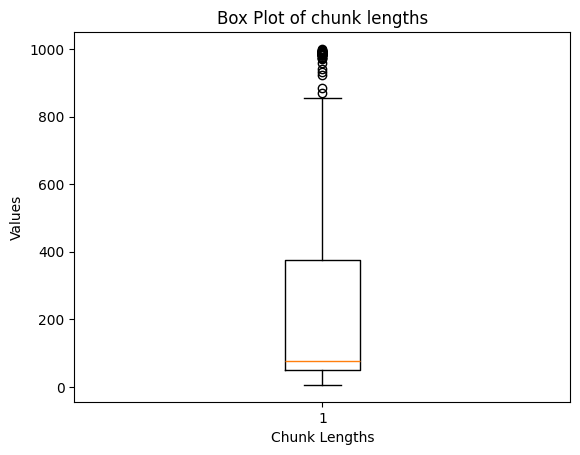

The median chunk lenght is : 75.5
The average chunk lenght is : 274.24
The minimum chunk lenght is : 6
The max chunk lenght is : 1000
The 75th percentile chunk length is : 376.75
The 25th percentile chunk length is : 50.25


In [151]:
data = [len(doc.page_content) for doc in final_chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')  # Title
plt.xlabel('Chunk Lengths')  # Label for x-axis
plt.ylabel('Values')  # Label for y-axis

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

There, we have our final chunks! 

### <span style="color:#47c7fc">Exercise: PDF Document (Employee Leave Policy)</span>

In the previous exercise you read the __Employee Leave Policy__ of AKAIWorks LLP. Now, you should use the recursive character splitter to create chunks of this document.

In [152]:
pdfloader=PyPDFLoader(file_path=filepath,mode="single") #instantiate the PyPDFLoader

pdf_data=pdfloader.load() #load the data

print(len(pdf_data[0].page_content))

82279


Your task is to now chunk this document into manageable sizes using __RecursiveCharacterTextSplitter__ and store in document object ```pdf_doc_chunks``` and print the number of chunks created.

In [153]:
#START YOUR CODE HERE
text_splitter =RecursiveCharacterTextSplitter(separators=["\n\n","\n","."], chunk_size=1000, chunk_overlap=100)
#END YOUR CODE HERE
pdf_doc_chunks=text_splitter.split_documents(pdf_data)

<details>
<summary>Click for Hint</summary>

Checkout the [RecursiveCharacterTextSplitter documentation](https://python.langchain.com/docs/how_to/recursive_text_splitter/)

</details>

<details>
<summary>Click for Solution</summary>

```
text_splitter =RecursiveCharacterTextSplitter(
separators=["\n\n","\n","."], #The character that should be used to split. More than one can be given to try recursively.
chunk_size=1000, #Number of characters in each chunk 
chunk_overlap=100, #Number of overlapping characters between chunks
)

pdf_doc_chunks=text_splitter.split_documents(pdf_data)
```

</details>

Let's check out the distribution of chunk sizes.

Run the cell below.

Remember the document object should be called ```pdf_doc_chunks```


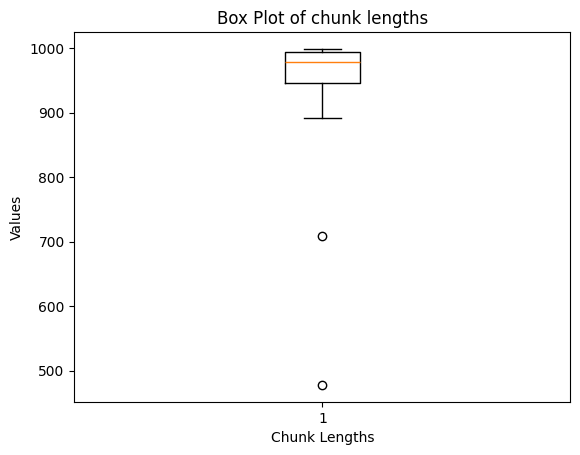

The median chunk lenght is : 979.0
The average chunk lenght is : 961.28
The minimum chunk lenght is : 478
The max chunk lenght is : 999
The 75th percentile chunk length is : 995.0
The 25th percentile chunk length is : 946.0


In [154]:
data = [len(doc.page_content) for doc in pdf_doc_chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')  # Title 
plt.xlabel('Chunk Lengths')  # Label for x-axis
plt.ylabel('Values')  # Label for y-axis

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

#### __Congratulations__

With this, you have successfully completed the chunking of the data. We move now to the next step of creating __Embeddings__

But before that, check out the splitters available in LangChain

__Text Splitters__  - [https://python.langchain.com/docs/concepts/text_splitters/]

---

## <span style="color:#ff8000">3. Data Transformation or Embeddings</span>


Computers, at the very core, do mathematical calculations. Mathematical calculations are done on numbers. Therefore, for a computer to process any kind of non-numeric data like text or image, it must be first converted into a numerical form. 

Embeddings is a design pattern that is extremely helpful in the fields of data science, machine learning and artificial intelligence. Embeddings are vector representations of data. As a general definition, embeddings are data that has been transformed into n-dimensional matrices. A word embedding is a vector representation of words. 

<img src="./Assets/Images/Embeddings.png" width=900>

#### __Open Source Embeddings from HuggingFace__

Let's begin with an opensource embeddings from HuggingFace!

In [155]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

hf_embeddings = embeddings.embed_documents([chunk.page_content for chunk in final_chunks])

In [156]:
print(f"The lenght of the embeddings vector is {len(hf_embeddings[0])}")
print(f"The embeddings object is an array of {len(hf_embeddings)} X {len(hf_embeddings[0])}")

The lenght of the embeddings vector is 768
The embeddings object is an array of 286 X 768


#### __OpenAI Embeddings__

OpenAI, the company behind ChatGPT and GPT series of Large Language Models also provide three Embeddings Models. 

1.	text-embedding-ada-002 was released in December 2022. It has a dimension of 1536 meaning that it converts text into a vector of 1536 dimensions.
2.	text-embedding-3-small is the latest small embedding model of 1536 dimensions released in January 2024. The flexibility it provides over ada-002 model is that users can adjust the size of the dimensions according to their needs.
3.	text-embedding-3-large is a large embedding model of 3072 dimensions released together with the text-embedding-3-small model. It is the best performing model released by OpenAI yet.


OpenAI models are proprietary and can be accessed using the OpenAI API and are priced based on the number of input tokens for which embeddings are desired. 


Note: You will need an __OpenAI API Key__ which can be obtained from [OpenAI](https://platform.openai.com/api-keys)

To initialize the __OpenAI client__, we need to pass the api key. There are many ways of doing it. 

__[Option 1] Creating a .env file for storing the API key and using it # Recommended__

Install the __dotenv__ library

_The dotenv library is a popular tool used in various programming languages, including Python and Node.js, to manage environment variables in development and deployment environments. It allows developers to load environment variables from a .env file into their application's environment._

- Create a file named .env in the root directory of their project.
- Inside the .env file, then define environment variables in the format VARIABLE_NAME=value. 

e.g.

OPENAI_API_KEY=YOUR API KEY

In [157]:
from dotenv import load_dotenv
import os

if load_dotenv():
    print("Success: .env file found with some environment variables")
else:
    print("Caution: No environment variables found. Please create .env file in the root directory or add environment variables in the .env file")

Success: .env file found with some environment variables


__[Option 2] Alternatively, you can set the API key in code.__

However, this is not recommended since it can leave your key exposed for potential misuse. Uncomment the cell below to use this method.

In [ ]:
#os.environ["GEMINI_API_KEY"] = ""

We can also test if the key is valid or not

In [161]:
import google.generativeai as genai

load_dotenv()
api_key = os.environ["GEMINI_API_KEY"]

if api_key:
    try:
        # Cấu hình API key cho Gemini
        genai.configure(api_key=api_key)

        # Kiểm tra API key bằng cách gọi thử model
        model = genai.GenerativeModel("gemini-2.0-flash")
        response = model.generate_content("Hello, can you confirm that my API key is valid?")

        print("GEMINI_API_KEY is set and is valid")
        print("Test response:", response.text[:100])

    except Exception as e:
        print(f"Error when connecting to Gemini API: {e}")

else:
    print("Please set your Google Gemini API key as an environment variable GEMINI_API_KEY")

GEMINI_API_KEY is set and is valid
Test response: I am not able to confirm the validity of your API key. I am an AI and do not have access to any API 


Now we will use the __OpenAIEmbeddings__ library from langchain 

In [162]:
genai.configure(api_key=api_key)

# Hàm tạo embeddings đúng cách
def get_embedding(text):
    response = genai.embed_content(model="models/embedding-001", content=text, task_type="retrieval_document")
    return response["embedding"] if "embedding" in response else None

# Tạo embeddings cho danh sách văn bản
gemini_embeddings = [get_embedding(chunk.page_content) for chunk in final_chunks]

In [163]:
print(f"The lenght of the embeddings vector is {len(gemini_embeddings[0])}")
print(f"The embeddings object is an array of {len(gemini_embeddings)} X {len(gemini_embeddings[0])}")

The lenght of the embeddings vector is 768
The embeddings object is an array of 286 X 768


### <span style="color:#47c7fc">Exercise: PDF Document (Employee Leave Policy)</span>

Now, the chunks that you created in the previous section you will need to convert them into embeddings. 

Use __text-embedding-3-small__ embeddings using __OpenAIEmbeddings__ from langchain. Store the embeddings in ```pdf_doc_embeddings```

In [164]:
#START YOUR CODE HERE

pdf_doc_embeddings = get_embedding([chunk.page_content for chunk in pdf_doc_chunks])

#END YOUR CODE HERE

<details>
<summary>Click for Hint</summary>

Checkout the [OpenAIEmbeddings documentation](https://python.langchain.com/docs/integrations/text_embedding/openai/)

</details>

<details>
<summary>Click for Solution</summary>

```
pdf_embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

pdf_doc_embeddings=embeddings.embed_documents([chunk.page_content for chunk in pdf_doc_chunks])
```

</details>

In [165]:
print(f"The lenght of the embeddings vector is {len(pdf_doc_embeddings[0])}")
print(f"The embeddings object is an array of {len(pdf_doc_embeddings)} X {len(pdf_doc_embeddings[0])}")

The lenght of the embeddings vector is 768
The embeddings object is an array of 93 X 768


#### __Congratulations__

With this, you have successfully completed the creation of embeddings. We move now to the next step of storing the embeddings in a  __Vector Store__

Read more about [Embedding Models Here](https://python.langchain.com/docs/integrations/text_embedding/)

---

## <span style="color:#ff8000">4. Vector Storage</span>


The data has been loaded, split, and converted into embeddings. For us to use this information repeatedly, we need to store it in memory so that it can be accessed on demand. Vector Databases are built to handle high dimensional vectors. These databases specialize in indexing and storing vector embeddings for fast semantic search and retrieval. 

In [166]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index = faiss.IndexFlatIP(len(gemini_embeddings[0]))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

vector_store.add_documents(documents=final_chunks)

['fda39b63-462b-406c-9627-f49c8ea3dc0c',
 'fce30f23-0b51-4fe3-a3d2-887e25f6ffbb',
 '42456e3a-5163-485c-b7cb-4993435d7015',
 'dc6ce966-b90a-4c74-aeed-2353c01cb30e',
 'c4ded2c6-7df4-4294-a90e-42fc0ac7a459',
 '0ab0c0a8-f760-433b-9bc5-83fa5c44610f',
 '6fe9ffa3-e921-4c0d-badc-d36727e41685',
 '8e795209-af46-417e-bdbc-96f8a23c9017',
 '45ff7336-7be9-4ea1-bc25-68f24a234ee2',
 '1757ec08-d7bf-4c3f-8d18-2412877e651e',
 '3a12a7ca-8377-45d5-bd8c-655c74db9a42',
 '468669c1-01c3-4d20-9c0b-c38fbc4e0c41',
 'e6e7b80c-6f55-425e-b852-2a47b3dd16c2',
 'ba8c8611-0447-4d5f-91fe-2b9431615f58',
 'c2435c83-f9ff-440e-9ea6-9398da63fd64',
 'bcd3ac1c-06be-47a0-bbff-9d3a3089dadc',
 '6691d7e6-2b9b-48be-a6ed-ce35527932ba',
 'da4dce89-af60-446d-9336-43903edfd21e',
 'f127d22a-088d-4482-a86d-3c55d697ca29',
 '134ae929-c0a9-400d-a73e-ac584f7acad2',
 'a298296b-2e7a-422b-a3e7-bbfa6b2afe6e',
 'a5c0e605-d0de-4d5f-91b3-549d6df7e1d2',
 'a0c51c01-ab19-4458-83ef-bcf161070174',
 '5946051a-f47f-4551-b25f-cb06e4053aa8',
 '3c379c91-f920-

We can also save the vector store in persistent memory!

In [167]:
vector_store.save_local(folder_path="./Memory", index_name="CWC_index")

### <span style="color:#47c7fc">Exercise: PDF Document (Employee Leave Policy)</span>

Create and store a __FAISS__ index. Use __IndexFlatIP__ 

Use __text-embedding-3-small__ embeddings using __OpenAIEmbeddings__ from langchain.

In [168]:
storage_file_path="./Memory"
storage_index_name="PDF_index"

In [171]:
pdf_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [172]:
index = faiss.IndexFlatIP(len(pdf_doc_embeddings[0]))

# Tạo vector store với Gemini embeddings
vector_store = FAISS(
    embedding_function=get_embedding,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

vector_store.add_documents(documents=pdf_doc_chunks)

vector_store.save_local(folder_path=storage_file_path, index_name=storage_index_name)

`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


<details>
<summary>Click for Hint</summary>

Checkout the [FAISS documentation](https://python.langchain.com/docs/integrations/vectorstores/faiss/)

</details>

<details>
<summary>Click for Solution</summary>

```
index = faiss.IndexFlatIP(len(pdf_doc_embeddings[0]))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

vector_store.add_documents(documents=pdf_doc_chunks)

vector_store.save_local(folder_path=storage_file_path,index_name=storage_index_name)
```

</details>

#### __Congratulations__

With this, you have successfully completed the creation the  __Vector Store__.

The four steps of loading, chunking, embedding and storing complete the __indexing pipeline__. Indexing pipeline is an __offline process__. The Vector Index needs to be created once and then updated at a periodic frequency.

Now, we will move on to the __generation pipeline__ and we will use this created index or knowledge base to handle real-time generations.

---

## <span style="color:#ff8000">Generation Pipeline</span>

The generation pipeline consists of three steps -

1. Retrieval
2. Augmentation
3. Generation

<img src="./Assets/Images/Generation Pipeline.png" width=500>

## <span style="color:#ff8000">1. Retrieval</span>

We will now retrieve a relevant passage from the knowledge base that is pertinent to our query - __"Who won the World Cup?"__

<img src="./Assets/Images/Retrieval.png" width=500>

In [175]:
# Load the FAISS vector store with safe deserialization
vector_store = FAISS.load_local(folder_path="./Memory",index_name="CWC_index", embeddings=embeddings, allow_dangerous_deserialization=True)

query = "Who won the World Cup?"
retrieved_docs = vector_store.similarity_search(query, k=2)  

for i, doc in enumerate(retrieved_docs):
    print(textwrap.fill(f"\nRetrieved Chunk {i+1}:\n{doc.page_content}",width=100))
    print("\n\n")

 Retrieved Chunk 1: India won by 70 runs   Wankhede Stadium ,  Mumbai



 Retrieved Chunk 2: Australia won by 5 runs   HPCA Stadium ,  Dharamshala





This is the most basic implementation of a retriever in the generation pipeline of a RAG-enabled system. This method of retrieval is enabled by embeddings. We used the text-embedding-3-small from OpenAI. FAISS calculated the similarity score based on these embeddings.

---

## <span style="color:#ff8000">2. Augmentation</span>

The information fetched by the retriever should also be sent to the LLM in form of a natural language prompt. This process of combining the user query and the retrieved information is called augmentation.


In [176]:
retrieved_context=retrieved_docs[0].page_content + retrieved_docs[1].page_content

# Creating the prompt
augmented_prompt=f"""

Given the context below answer the question.

Question: {query} 

Context : {retrieved_context}

Remember to answer only based on the context provided and not from any other source. 

If the question cannot be answered based on the provided context, say I don’t know.

"""

print(textwrap.fill(augmented_prompt,width=150))

  Given the context below answer the question.  Question: Who won the World Cup?   Context : India won by 70 runs   Wankhede Stadium ,
MumbaiAustralia won by 5 runs   HPCA Stadium ,  Dharamshala  Remember to answer only based on the context provided and not from any other source.   If
the question cannot be answered based on the provided context, say I don’t know.


---

## <span style="color:#ff8000">3. Generation</span>

Generation is the final step of this pipeline. While LLMs may be used in any of the previous steps in the pipeline, the generation step is completely reliant on the LLM. The most popular LLMs are the ones being developed by OpenAI, Anthropic, Meta, Google, Microsoft and Mistral amongst other developers. 

We have built a simple retriever using FAISS and OpenAI embeddings and, we created a simple augmented prompt. Now we will use OpenAI’s model, GPT-4o-mini, to generate the response.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

#os.environ["GOOGLE_API_KEY"] = ""

# Khởi tạo mô hình Gemini với API Key
llm = ChatGoogleGenerativeAI(
    google_api_key="",  
    model="gemini-2.0-flash",  
    temperature=0.7
)

augmented_prompt = "Who won the World Cup?"

messages=[("human", augmented_prompt)]

ai_msg = llm.invoke(messages)

print("Gemini Response:", ai_msg.content)

Gemini Response: Argentina won the World Cup in 2022.


In [192]:
ai_msg.content

'Argentina won the World Cup in 2022.'

And there you have it. The response is rooted in the HTML document and based on the chunks retrieved from the vector database.

### <span style="color:#47c7fc">Exercise: PDF Document</span>

Your exercise is to get an answer to the question - __How many paternity leaves can I avail?__

The FAISS Index __PDF_index__ has already been created by you in the previous exercise. Now use __similarity_search__ and __ChatOpenAI__ library to get your answer.

Begin with the loading the index and retrieve the chunks. Retrieve top 2 chunks.

In [195]:
# Load the FAISS vector store with safe deserialization
#embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vector_store = FAISS.load_local(folder_path="./Memory",index_name="PDF_index", embeddings=embeddings, allow_dangerous_deserialization=True)

# Define a query
query = "How many paternity leaves can I avail?"

# Perform similarity search to get top 2 relevant chunks
retrieved_docs = vector_store.similarity_search(query, k=2)

for i, doc in enumerate(retrieved_docs):
    print(textwrap.fill(f"Retrieved Chunk {i+1}:\n{doc.page_content}",width=100))
    print("\n")

Retrieved Chunk 1: unpaid   leave   after   the   maternity   leave   period.  3.  Paternity  Leave:
○  Entitlement :  Male  employees  are  entitled  to  7  days  of  paid  paternity  leave  in  the
event   of   the   birth   or   adoption   of   a   child.  ○  Eligibility :  Employees  must  have
been  with  the  company  for  a  minimum  of  6   months   to   be   eligible   for   paternity
leave.  ○  Requesting  Leave :  Paternity  leave  should  be  requested  2  weeks  in  advance,
except   in   cases   of   emergency.  4.  Bereavement  Leave:    ○  Entitlement :  Employees  are
entitled  to  3  days  of  paid  leave  in  the  event  of  the   death   of   an   immediate
family   member   (spouse,   children,   parents,   siblings).  ○  Extended  Family :  Leave  for
the  death  of  extended  family  members  (such  as   grandparents,   uncles,   aunts)   may   be
granted   on   a   case-by-case   basis.


Retrieved Chunk 2: entitlements   will   be   revised   according   to   t

<details>
<summary>Click for Solution</summary>

```

# Load the FAISS vector store with safe deserialization
vector_store = FAISS.load_local(folder_path="./Memory",index_name="PDF_index", embeddings=embeddings, allow_dangerous_deserialization=True)

# Define a query
query = "How many paternity leaves can I avail"

# Perform similarity search to get top 2 relevant chunks
retrieved_docs = vector_store.similarity_search(query, k=2)


```

</details>

Now craft the augmented prompt!

In [196]:
#START YOUR CODE HERE
retrieved_context=retrieved_docs[0].page_content + retrieved_docs[1].page_content

augmented_prompt=f"""

Given the context below answer the question.

Question: {query}

Context : {retrieved_context}

Remember to answer only based on the context provided and not from any other source.

If the question cannot be answered based on the provided context, say I don’t know.

"""

#END YOUR CODE HERE
print(textwrap.fill(augmented_prompt,width=150))

  Given the context below answer the question.  Question: How many paternity leaves can I avail?  Context : unpaid   leave   after   the   maternity
leave   period.  3.  Paternity  Leave:    ○  Entitlement :  Male  employees  are  entitled  to  7  days  of  paid  paternity  leave  in  the   event
of   the   birth   or   adoption   of   a   child.  ○  Eligibility :  Employees  must  have  been  with  the  company  for  a  minimum  of  6   months
to   be   eligible   for   paternity   leave.  ○  Requesting  Leave :  Paternity  leave  should  be  requested  2  weeks  in  advance,   except   in
cases   of   emergency.  4.  Bereavement  Leave:    ○  Entitlement :  Employees  are  entitled  to  3  days  of  paid  leave  in  the  event  of  the
death   of   an   immediate   family   member   (spouse,   children,   parents,   siblings).  ○  Extended  Family :  Leave  for  the  death  of
extended  family  members  (such  as   grandparents,   uncles,   aunts)   may   be   granted   on   a   case

<details>
<summary>Click for Solution</summary>

```

retrieved_context=retrieved_docs[0].page_content + retrieved_docs[1].page_content

# Creating the prompt
augmented_prompt=f"""

Given the context below answer the question.

Question: {query} 

Context : {retrieved_context}

Remember to answer only based on the context provided and not from any other source. 

If the question cannot be answered based on the provided context, say I don’t know.

"""


```

</details>

Finally, make the call to the LLM. Use OpenAI's __gpt-4o-mini__ model

In [197]:
llm = ChatGoogleGenerativeAI(
    google_api_key=api_key,  
    model="gemini-2.0-flash",  
    temperature=0.7
)

context = "\n\n".join([doc.page_content for doc in retrieved_docs])

final_prompt = f"Based on the following document excerpts, answer the query: \n{query}\n\n{context}"

ai_msg = llm.invoke(final_prompt)

print("Response:", ai_msg.content)

Response: Based on the document, male employees are entitled to 7 days of paid paternity leave in the event of the birth or adoption of a child. The document does not mention any limitations on the number of times this leave can be availed.


<details>
<summary>Click for Solution</summary>

```

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=None,
    timeout=None
)

messages=[("human",augmented_prompt)]

ai_msg = llm.invoke(messages)


```

</details>

#### __Congratulations__

With this, you have completed the construction of the core RAG pipeline!!! In the cell below you'll find all the above generation pipeline code in a single function.

In [198]:
import re

# Function to clean text
def clean_text(text):
    # Replace non-breaking space with regular space
    text = text.replace('\xa0', ' ')

    # Remove any HTML tags (if any)
    text = re.sub(r'<[^>]+>', '', text)  # Removes HTML tags

    # Remove references in brackets (e.g., [7], [39])
    text = re.sub(r'\[.*?\]', '', text)  # Removes references inside square brackets

    # Remove extra spaces and newlines
    text = ' '.join(text.split())  # This will remove extra spaces and newline characters

    return text

def rag_function(query, db_path, index_name):
    embeddings=GoogleGenerativeAIEmbeddings(model="models/embedding-001")

    db=FAISS.load_local(folder_path=db_path, index_name=index_name, embeddings=embeddings, allow_dangerous_deserialization=True)

    retrieved_docs = db.similarity_search(query, k=2)

    retrieved_context=[clean_text(retrieved_docs[0].page_content +" "+ retrieved_docs[1].page_content)]


    augmented_prompt=f"""

    Given the context below answer the question.

    Question: {query}

    Context : {retrieved_context}

    Remember to answer only based on the context provided and not from any other source.

    If the question cannot be answered based on the provided context, say I don’t know.

    """

    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        temperature=0.7
    )

    messages=[("human",augmented_prompt)]

    ai_msg = llm.invoke(messages)

    response=ai_msg.content

    return retrieved_context, response

In [201]:
rag_function(query="How many paternity leaves can I avail?", db_path="./Memory", index_name="PDF_index")

(['unpaid leave after the maternity leave period. 3. Paternity Leave: ○ Entitlement : Male employees are entitled to 7 days of paid paternity leave in the event of the birth or adoption of a child. ○ Eligibility : Employees must have been with the company for a minimum of 6 months to be eligible for paternity leave. ○ Requesting Leave : Paternity leave should be requested 2 weeks in advance, except in cases of emergency. 4. Bereavement Leave: ○ Entitlement : Employees are entitled to 3 days of paid leave in the event of the death of an immediate family member (spouse, children, parents, siblings). ○ Extended Family : Leave for the death of extended family members (such as grandparents, uncles, aunts) may be granted on a case-by-case basis. entitlements will be revised according to the company’s full leave policy. 2. Leave Entitlement for Employees on Temporary Contracts: ○ Temporary employees will be entitled to leave as per the terms of their contract, which may differ from the standa

Is the RAG system that we have created generating the responses on the expected lines? Is the LLM still hallucinating? Before trying to improve the performance of the system we need to be able to measure and benchmark it.

## <span style="color:#ff8000">Evaluation</span>


[Ragas](https://docs.ragas.io/en/stable/) is a framework that helps you evaluate your Retrieval Augmented Generation (RAG) pipelines. It has been developed by the good folks at [exploding gradients](https://github.com/explodinggradients).

We will look at this evaluation in 2 parts. 

1. Creation of synthetic test data for evaluation.
2. Calculation of evaluation metrics.

### 2.1 Creation of Synthetic Data

Synthetic Data Generation uses LLMs to generate diverse questions and answers from the documents in the knowledge base. LLMs can be prompted to create questions like simple questions, multi-context questions, conditional questions, reasoning questions etc. using the documents from the knowledge base as context.

<img src="./Assets/Images/SData.png" width=500>

In [202]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper

In [203]:
generator_llm = LangchainLLMWrapper(ChatGoogleGenerativeAI(model="gemini-2.0-flash"))
generator_embeddings = LangchainEmbeddingsWrapper(GoogleGenerativeAIEmbeddings(model="models/text-embedding-004"))

In [204]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(html_data_transformed, testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/1 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/1 [00:00<?, ?it/s]

Applying SummaryExtractor:   0%|          | 0/1 [00:00<?, ?it/s]

Applying CustomNodeFilter:   0%|          | 0/10 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/17 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/1 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/2 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Generating Samples:   0%|          | 0/10 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with

In [205]:
sample_queries = dataset.to_pandas()['user_input'].to_list()

In [206]:
expected_responses=dataset.to_pandas()['reference'].to_list()

In [207]:
dataset_to_eval=[]

for query, reference in zip(sample_queries,expected_responses):
    rag_call_response=rag_function(query=query, db_path="./Memory", index_name="CWC_index")
    relevant_docs=rag_call_response[0]
    response=rag_call_response[1]
    dataset_to_eval.append(
        {
            "user_input":query,
            "retrieved_contexts":relevant_docs,
            "response":response,
            "reference":reference
        }
    )

In [208]:
from ragas import EvaluationDataset

evaluation_dataset = EvaluationDataset.from_list(dataset_to_eval)

In [209]:
from ragas import evaluate
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, AnswerCorrectness, ResponseRelevancy
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings

evaluator_llm = LangchainLLMWrapper(ChatGoogleGenerativeAI(model="gemini-2.0-flash"))

result = evaluate(dataset=evaluation_dataset,metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness()],llm=evaluator_llm)
result

Evaluating:   0%|          | 0/30 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with

{'context_recall': 0.2000, 'faithfulness': 0.0938, 'factual_correctness': 0.0000}

### <span style="color:#47c7fc">Exercise: PDF Document</span>

In this final exercise, you need to generate a synthetic dataset using Ragas and then evaluate the responses of your RAG pipeline for the synthetically generated queries.

In [210]:
### Complete the Code Below

generator_llm = LangchainLLMWrapper(ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.7))
generator_embeddings = LangchainEmbeddingsWrapper(GoogleGenerativeAIEmbeddings(model="models/text-embedding-004"))
generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(pdf_data, testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/1 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/1 [00:00<?, ?it/s]

Applying SummaryExtractor:   0%|          | 0/1 [00:00<?, ?it/s]

Applying CustomNodeFilter:   0%|          | 0/12 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/25 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/1 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/2 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Generating Samples:   0%|          | 0/10 [00:00<?, ?it/s]

<details>
<summary>Click for Solution</summary>


```
generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4o-mini"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings(model="text-embedding-3-small"))
generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(pdf_data, testset_size=10)
```

</details>

In [211]:
sample_queries_pdf = dataset.to_pandas()['user_input'].to_list()
expected_responses_pdf=dataset.to_pandas()['reference'].to_list()

Now, create the dataset to eval

In [213]:
dataset_to_eval_pdf=[]

# START YOUR CODE
for query, reference in zip(sample_queries_pdf,expected_responses_pdf):
    rag_call_response=rag_function(query=query, db_path="./Memory", index_name="PDF_index")
    relevant_docs=rag_call_response[0]
    response=rag_call_response[1]
    dataset_to_eval_pdf.append(
        {
            "user_input":query,
            "retrieved_contexts":relevant_docs,
            "response":response,
            "reference":reference
        }
    )
# END YOUR CODE
evaluation_dataset_pdf = EvaluationDataset.from_list(dataset_to_eval_pdf)

<details>
<summary>Click for Solution</summary>

```
for query, reference in zip(sample_queries_pdf,expected_responses_pdf):
    rag_call_response=rag_function(query=query, db_path="./Memory", index_name="PDF_index")
    relevant_docs=rag_call_response[0]
    response=rag_call_response[1]
    dataset_to_eval_pdf.append(
        {
            "user_input":query,
            "retrieved_contexts":relevant_docs,
            "response":response,
            "reference":reference
        }
    )

```

</details>

Now, we calculate a few evaluation metrics - __ContextRecall, Faithfulness, FactualCorrectness, AnswerCorrectness & ResponseRelevancy__

In [215]:
embeddings = GoogleGenerativeAIEmbeddings(model="text-embedding-004")

result = evaluate(
    dataset=evaluation_dataset_pdf,
    metrics=[LLMContextRecall(), Faithfulness(), AnswerCorrectness(), ResponseRelevancy(), FactualCorrectness()],
    llm=evaluator_llm,
    embeddings=embeddings
)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with

In [216]:
result

{'context_recall': 0.5524, 'faithfulness': 1.0000, 'answer_correctness': nan, 'answer_relevancy': nan, 'factual_correctness': 0.3814}

---

## <span style="color:#ff8000">Congratulations!</span>
For completing this introduction to RAG. I hope you had fun. For any queries, please get in touch!

<img src="./Assets/Images/profile_s.png" width=100> 

Hi! I'm Abhinav! I am an entrepreneur and Vice President of Artificial Intelligence at Yarnit. I have spent over 15 years consulting and leadership roles in data science, machine learning and AI. My current focus is in the applied Generative AI domain focussing on solving enterprise needs through contextual intelligence. I'm passionate about AI advancements constantly exploring emerging technologies to push the boundaries and create positive impacts in the world. Let’s build the future, together!

[If you haven't already, get your copy of A Simple Guide to Retrieval Augmented Generation here](https://mng.bz/6ePo)

USE CODE ```OUkimothi``` for a 45% discount!

<a href="https://mng.bz/6ePo" target="_blank">
    <img src="./Assets/Images/NewMEAPFooter.png" alt="New MEAP" width= 70%" />
</a>

#### If you'd like to chat, I'd be very happy to connect

[![GitHub followers](https://img.shields.io/badge/Github-000000?style=for-the-badge&logo=github&logoColor=black&color=orange)](https://github.com/abhinav-kimothi)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-000000?style=for-the-badge&logo=linkedin&logoColor=orange&color=black)](https://www.linkedin.com/comm/mynetwork/discovery-see-all?usecase=PEOPLE_FOLLOWS&followMember=abhinav-kimothi)
[![Medium](https://img.shields.io/badge/Medium-000000?style=for-the-badge&logo=medium&logoColor=black&color=orange)](https://medium.com/@abhinavkimothi)
[![Insta](https://img.shields.io/badge/Instagram-000000?style=for-the-badge&logo=instagram&logoColor=orange&color=black)](https://www.instagram.com/akaiworks/)
[![Mail](https://img.shields.io/badge/email-000000?style=for-the-badge&logo=gmail&logoColor=black&color=orange)](mailto:abhinav.kimothi.ds@gmail.com)
[![X](https://img.shields.io/badge/Follow-000000?style=for-the-badge&logo=X&logoColor=orange&color=black)](https://twitter.com/abhinav_kimothi)
[![Linktree](https://img.shields.io/badge/Linktree-000000?style=for-the-badge&logo=linktree&logoColor=black&color=orange)](https://linktr.ee/abhinavkimothi)
[![Gumroad](https://img.shields.io/badge/Gumroad-000000?style=for-the-badge&logo=gumroad&logoColor=orange&color=black)](https://abhinavkimothi.gumroad.com/)

---